In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import hvplot.pandas
import geopandas as gpd
import os
import holoviews as hv
import seaborn as sns
from sklearn.linear_model import LinearRegression
 
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [2]:
temp_df     = pd.read_csv("Resources/CA avg temps 2000-2020.csv")
precip_df   = pd.read_csv("Resources/CA total precip 2000-2020.csv")
beefprod_df = pd.read_csv("Resources/CA beef production 2000-2020.csv")
wheatprod_df = pd.read_csv("Resources/CA wheat production 2000-2020.csv")
data =pd.read_csv("Resources/CA avg temps and beef 2000-2020.csv")

In [3]:
# Load csv file into datafram
ca_county_df = pd.read_csv("Resources/ca_county_data.csv")

# ca_county_df.dtypes

# Display df
ca_county_df

,District,County,County Seat,Lat,Lng,Beef cows (head),Beef cows (% of total)
0,Southern California,Imperial,"El Centro ,California",32.792000,-115.563051,0,0.00%
1,Central Coast,Contra Costa,"Martinez ,California",33.562804,-116.153060,0,0.00%
2,Southern California,San Diego,"San Diego ,California",32.717420,-117.162773,3900,0.72%
3,Southern California,San Bernardino,"San Bernardino ,California",34.108162,-117.289460,3600,0.67%
4,Southern California,Riverside,"Riverside ,California",33.982495,-117.374239,1500,0.28%
5,Southern California,Orange,"Santa Ana ,California",33.749495,-117.873221,0,0.00%
6,Sierra Mountains,Inyo,"Independence ,California",36.802506,-118.199718,0,0.00%
7,Southern California,Los Angeles,"Los Angeles ,California",34.053691,-118.242766,0,0.00%
8,San Joaquin Valley,Kern,"Bakersfield ,California",35.373871,-119.019464,41500,7.70%
9,Sierra Mountains,Mono,"Bridgeport ,California",38.255757,-119.231267,0,0.00%


In [4]:
%%capture --no-display

# Configure map
ca_map_plot = ca_county_df.hvplot.points(
    "Lng", 
    "Lat",
    geo=True,
    color="District",
    tiles = "EsriNatGeo",
    size="Beef cows (head)",
    hover_cols=["District", "County", "County Seat", "Beef cows (% of total)"],
    frame_width=600,
    frame_height=600,
    scale = 0.15,
    title="California County Map",
    legend="top_right"
    )


# Display map
ca_map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (District,Beef cows (head),County Seat,Beef cows (% of total))

Unsuprisingly, San Joaquin Valley and Sacramento Valley have the largest number of cattle. 
The weather is more consistent and the valleys provide food through pastures and grasses etc. that grow in the open areas.

In [5]:
# Group by "District" and sum the "Beef cows (head)"
region_df = ca_county_df.groupby("District")["Beef cows (head)"].sum().reset_index()

# Sort the DataFrame by "Beef cows (head)" in descending order
region_df = region_df.sort_values(by="Beef cows (head)", ascending=False)

# Display the new DataFrame
region_df


,District,Beef cows (head)
4,San Joaquin Valley,223300
0,Central Coast,88400
3,Sacramento Valley,86900
6,Sisklyou-Shasta,43900
2,Northern Coast,34600
5,Sierra Mountains,27600
1,Northeast,22000
7,Southern California,12500


<Axes: title={'center': 'Total Beef Cows by District'}, xlabel='District', ylabel='Total Beef Cows'>

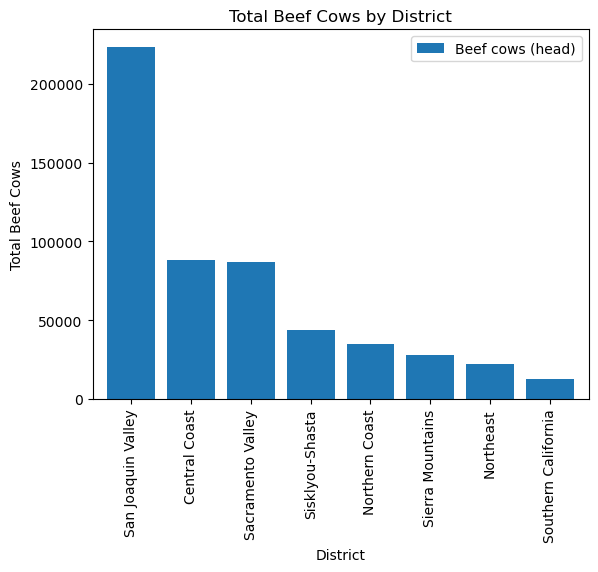

In [6]:
# Create regional bar chart

ca_region_chart = region_df.plot.bar(x="District", 
                                     y="Beef cows (head)",
                                    xlabel="District",
                                    ylabel="Total Beef Cows",
                                    title="Total Beef Cows by District",
                                    width=0.8,
                                    )

# Show bar chart
ca_region_chart

The bar graph shows something that was hard to see in the map -while it is not surprising that San Joaquin Valley has the most 
cattle, what was unexpected is that the Central Coast and Sacramento Valley have nearly the same number of cattle. The Central Coast climate is more temperate than the extremes of southern and northern regions so also provides a more stable environment for cattle to thrive.

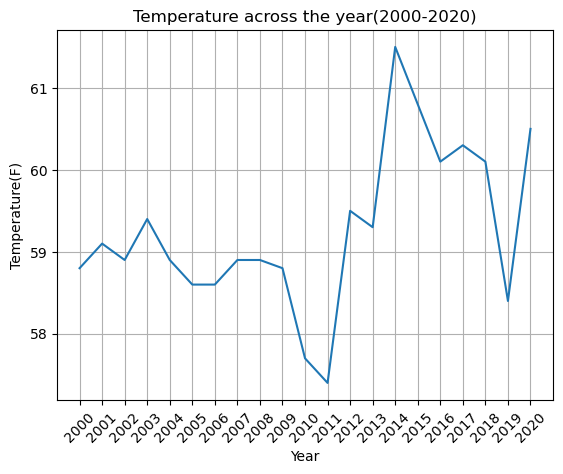

In [7]:
temp_df["Year"]=temp_df["Year"].astype(str)

#trend in temperature
x_values=temp_df["Year"]
y_values=temp_df["Avg Temp"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title("Temperature across the year(2000-2020)")
plt.xlabel("Year")
plt.ylabel("Temperature(F)")
plt.grid()
plt.savefig("Output/trend in temperature")
plt.show()

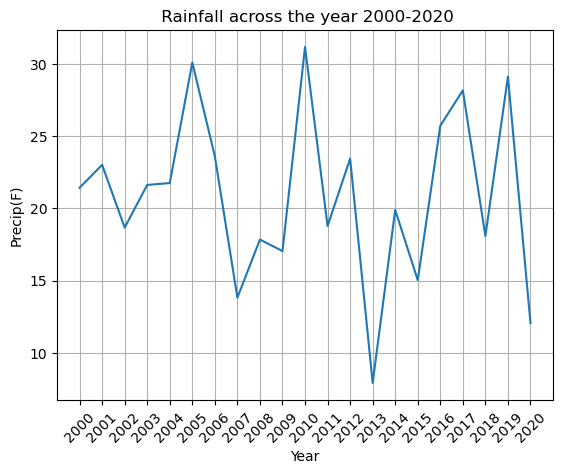

In [8]:
precip_df["Year"]=precip_df["Year"].astype(str)

#trend in rainfall
x_values=precip_df["Year"]
y_values=precip_df["Total Precip"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title(" Rainfall across the year 2000-2020")
plt.xlabel("Year")
plt.ylabel("Precip(F)")
plt.grid()
plt.savefig("Output/trend in rainfall")
plt.show()

In [9]:
#clean beef dataframe

beefprod_df["beef prod(Billion LB)"]=beefprod_df["beef production in LB"].str.replace(",","").astype(float)/1000000000
beefprod_df["beef prod(Billion LB)"]=round(beefprod_df["beef prod(Billion LB)"],2)
beefprod_df["Year"]=beefprod_df["Year"].astype(str)

In [10]:
beefprod_df

,Year,beef production in LB,beef prod(Billion LB)
0,2000,"1,923,165,000",1.92
1,2001,"1,992,529,000",1.99
2,2002,"1,832,884,000",1.83
3,2003,"1,987,446,000",1.99
4,2004,"1,982,875,000",1.98
5,2005,"1,926,565,000",1.93
6,2006,"1,994,084,000",1.99
7,2007,"1,976,564,000",1.98
8,2008,"1,995,264,000",2.00
9,2009,"1,896,641,000",1.90


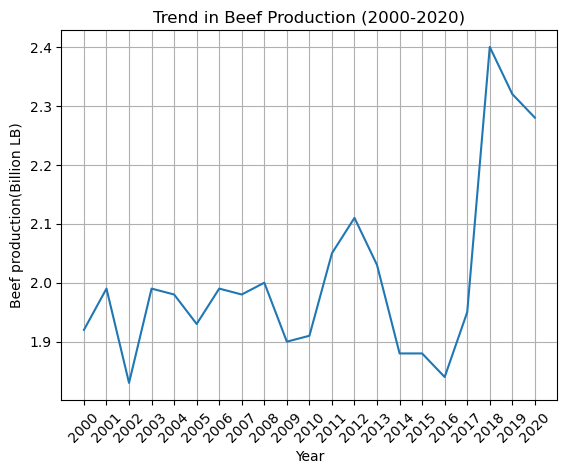

In [11]:
#trend in beef production 
x_values=beefprod_df["Year"]
y_values=beefprod_df["beef prod(Billion LB)"]
plt.plot(x_values,y_values)
plt.xticks(rotation=45)
plt.title("Trend in Beef Production (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef production(Billion LB)")
plt.savefig("Output/trend in beef production")
plt.grid()
plt.show()

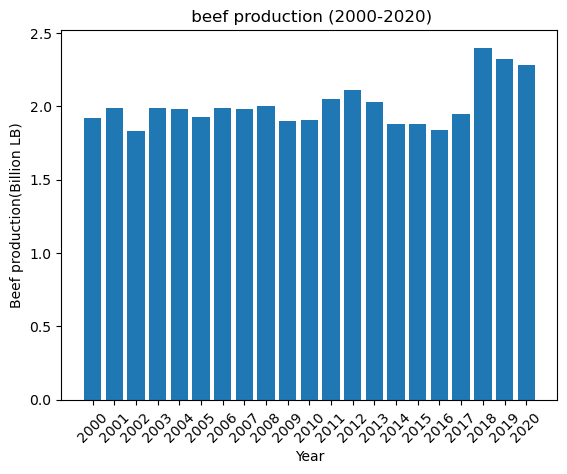

In [12]:
#beef production by  year
x_values=beefprod_df["Year"]
y_values=beefprod_df["beef prod(Billion LB)"]
plt.bar(x_values,y_values)
plt.xticks(rotation=45)
plt.title(" beef production (2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef production(Billion LB)")
plt.savefig("Output/Beef Production by year")
plt.show()

In [13]:
data["Year"] = pd.to_datetime(data["Year"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Year             21 non-null     datetime64[ns]
 1   Avg_Temp         21 non-null     float64       
 2   Beef_production  21 non-null     float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 632.0 bytes


In [14]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Year,21,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002,1970-01-01 00:00:00.000002005,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002015,1970-01-01 00:00:00.000002020,NaN
Avg_Temp,21.0,59.261905,57.4,58.8,58.9,60.1,61.5,0.999238
Beef_production,21.0,25612.942857,23394.9,25384.8,25854.3,26199.8,26821.4,956.308358


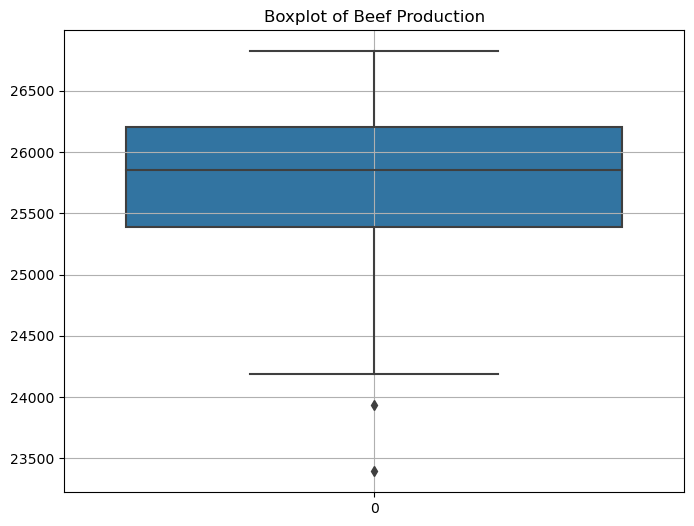

In [15]:
# Plotting a box plot to identify outliers
plt.figure(figsize=(8,6))
sns.boxplot(data["Beef_production"])
plt.title("Boxplot of Beef Production")
plt.grid()
plt.show()

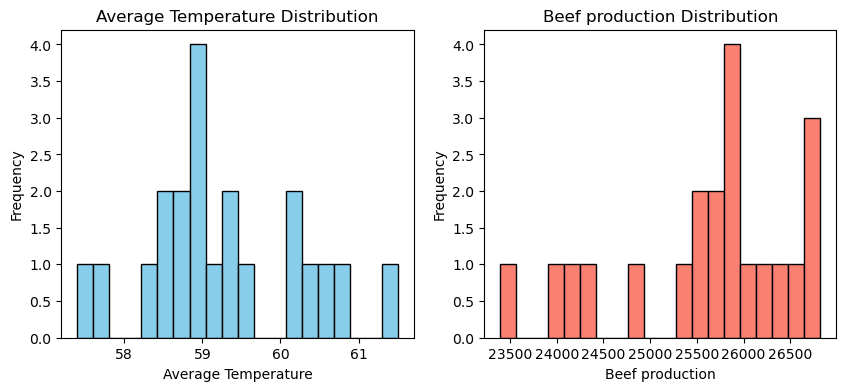

In [16]:
plt.figure(figsize=(10,4))

#Ploting histogram for Average Temperature
plt.subplot(1,2,1)
plt.hist(data["Avg_Temp"], bins=20, color="skyblue", edgecolor='black')
plt.title("Average Temperature Distribution")
plt.xlabel("Average Temperature")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(data["Beef_production"], bins=20, color="salmon", edgecolor='black')
plt.title("Beef production Distribution")
plt.xlabel("Beef production")
plt.ylabel("Frequency")

plt.show()

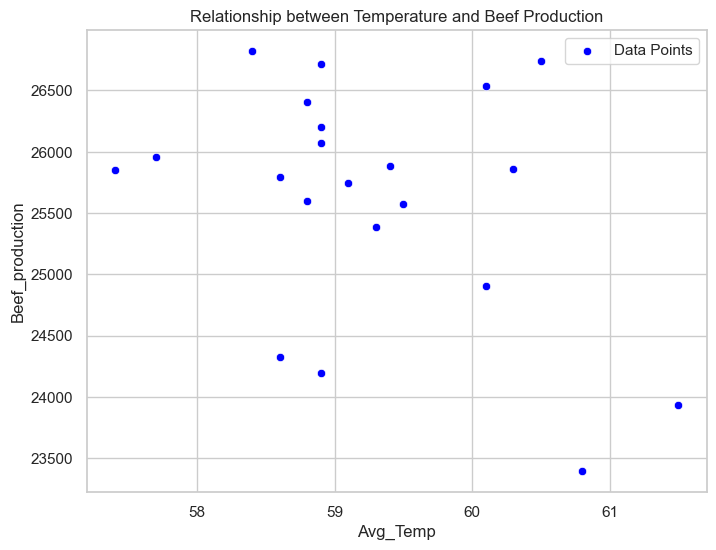

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.scatterplot(x="Avg_Temp", y = "Beef_production", data=data, color="Blue", label='Data Points')
plt.title('Relationship between Temperature and Beef Production')
plt.legend()

plt.show()

In [18]:
model = LinearRegression()
model.fit(data[['Avg_Temp']], data['Beef_production'])
slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(data[['Avg_Temp']], data['Beef_production'])

print(f"R squared value for the regression: {r_squared}")
print(f"Slope of the regression line: {slope}")
print(f"Intercept of the regression line: {intercept}")

R squared value for the regression: 0.14430186455533456
Slope of the regression line: -363.55076783670387
Intercept of the regression line: 47157.65383679895


The r squared value is :0.02


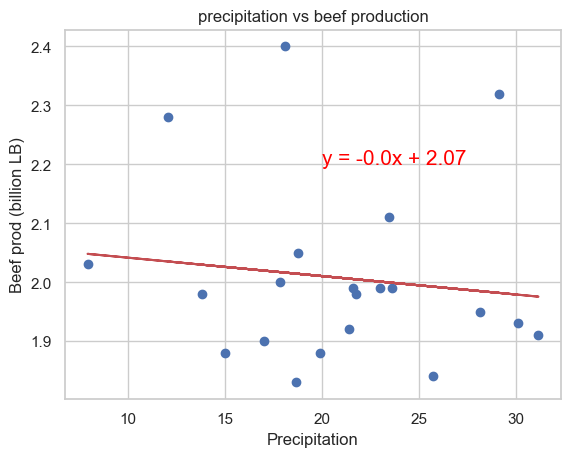

In [19]:
#Scatter plot
x_values = precip_df ["Total Precip"]
y_values=beefprod_df["beef prod(Billion LB)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2.2),fontsize=15,color="red")
plt.xlabel("Precipitation")
plt.ylabel("Beef prod (billion LB)")
plt.title("precipitation vs beef production")
print(f"The r squared value is :{round(rvalue**2,2)}")
plt.show()

In [20]:
def standard(arr): # Function converts data into standard units
    stand = (arr - np.mean(arr))/np.std(arr)
    return stand

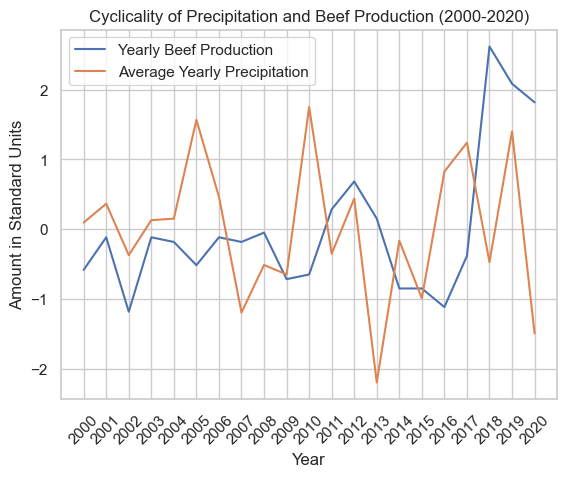

In [21]:
plt.plot(np.array(range(2000,2021)).astype(str), standard(beefprod_df["beef prod(Billion LB)"]), label = "Yearly Beef Production")
plt.plot(np.array(range(2000,2021)).astype(str), standard(precip_df['Total Precip']), label = "Average Yearly Precipitation")
plt.title('Cyclicality of Precipitation and Beef Production (2000-2020)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Amount in Standard Units')
plt.legend()
plt.show()



In [22]:
def standard(arr): # Function converts data into standard units
    stand = (arr - np.mean(arr))/np.std(arr)
    return stand



### Conclusion 

##### While comparing AVG annual Precipitation with AVG annual beef production, a regression line was not a suitable method for analysing the relationship between precipitation and beef production. This is because a scatterplot of twenty data points for average values does not provide enough meaningful information about the impact that fluctuating precipitation amounts have on production.

##### Therefore the chosen approach is to simultaneously plot production and precipitation amounts to understand the relationship between the two. Since beef production is reported in billions of pounds and annual precipitation is reported in inches, it is necessary to convert these values into standard units to avoid large disparities in the visualization of the data. The figure provides production and precipitation amounts in standard units.

##### From our analysis and the corresponding plot above, it is shown that there is a significant relationship between precipitation amounts and beef yeild. We see that when precipitation decreases, the beef yeild is likely to decline and similarly when precipitation increases, so does beef production. It is also important to note that when precipitation increases or decreases year by year, the repsonse in beef production is slightly delayed. Nonetheless, the plot above shows that there is a noteworthy relationship between precipitation and beef production. 

In [23]:
wheatprod_df.dtypes


Year               int64
wheat prod(BU)    object
dtype: object

In [24]:
#clean dataframe
wheatprod_df["Year"]=wheatprod_df["Year"].astype(str)
wheatprod_df["wheat prod(BU)"]=wheatprod_df["wheat prod(BU)"].str.replace(",","").astype(float)/1000000

In [25]:
wheatprod_df=wheatprod_df.rename(columns={"wheat prod(BU)":"wheat prod(million BU)"})

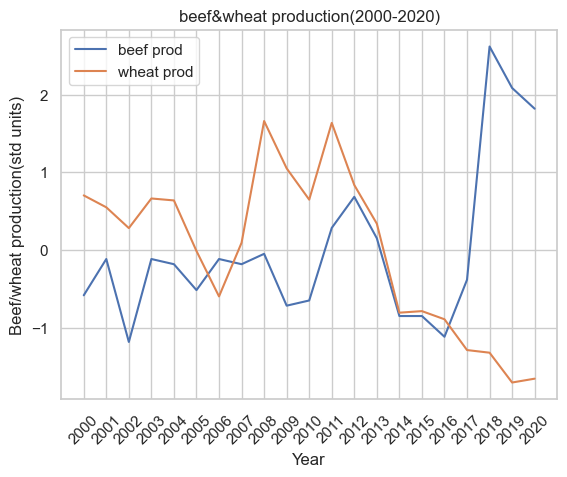

In [26]:
x_values=beefprod_df["Year"]
y1_values=standard(beefprod_df["beef prod(Billion LB)"])
y2_values=standard(wheatprod_df["wheat prod(million BU)"])
plt.plot(x_values, y1_values,label="beef prod")
plt.plot(x_values, y2_values, label="wheat prod")
plt.xticks(rotation=45)
plt.legend()
plt.title("beef&wheat production(2000-2020)")
plt.xlabel("Year")
plt.ylabel("Beef/wheat production(std units)")
plt.savefig("Output/beef & wheat production over the year")
plt.show()

In [27]:
wheat_beef_df=pd.merge(wheatprod_df,beefprod_df,how="inner",on="Year")


In [28]:
wheat_beef_df=wheat_beef_df[["Year","wheat prod(million BU)","beef prod(Billion LB)"]]
wheat_beef_df.describe().T

,count,mean,std,min,25%,50%,75%,max
wheat prod(million BU),21.0,28.334714,12.654343,7.244,18.35,31.80,36.51,48.825
beef prod(Billion LB),21.0,2.007619,0.153522,1.830,1.91,1.98,2.03,2.400


The r squared value is :0.16


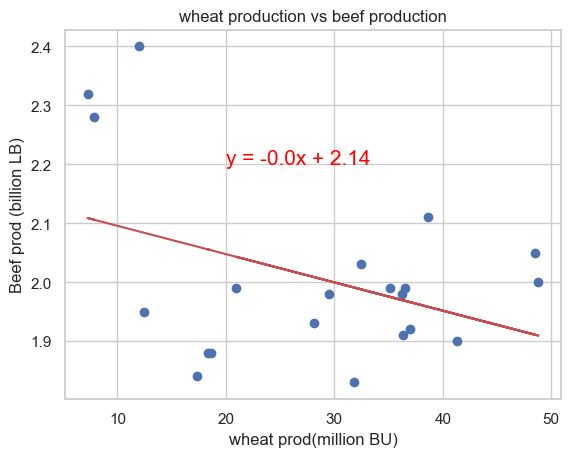

In [29]:
#Scatter plot and linear regression of wheat production vs beaf production

x_values =wheatprod_df["wheat prod(million BU)"]
y_values=beefprod_df["beef prod(Billion LB)"]


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,2.2),fontsize=15,color="red")
plt.xlabel("wheat prod(million BU)")
plt.ylabel("Beef prod (billion LB)")
plt.title("wheat production vs beef production")
plt.savefig("Output/wheat vs beaf production")

print(f"The r squared value is :{round(rvalue**2,2)}")
plt.show()

Conclusion:The wheat production has less effect of 16% in comparison with beef production